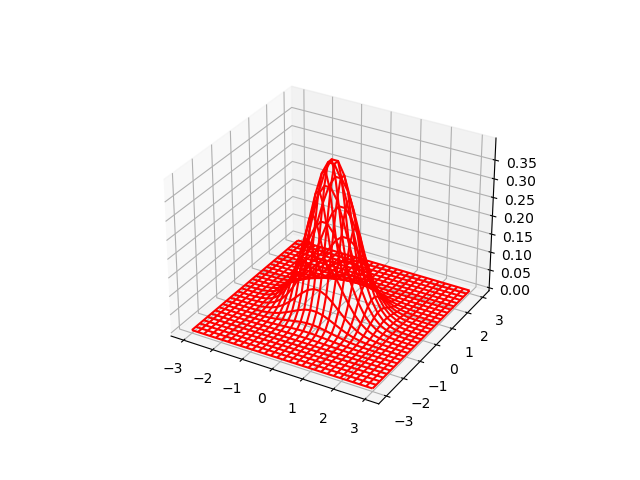

<class 'mpl_toolkits.mplot3d.art3d.Line3DCollection'>


In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-3:3:30j, -3:3:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

Sigma = np.array([.5, .3]) # the covariance matrix
covariance = np.diag(Sigma)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# ax.plot_surface(x,y,z)
l = ax.plot_wireframe(x,y,z, color='r')

plt.show()
print(type(l))

In [8]:
i=15
j=15
print(z[i,j])
p = multivariate_normal.pdf([x[i,j],y[i,j]], mean=mu, cov=covariance)
print(p)

0.39937496983668797
0.39937496983668797


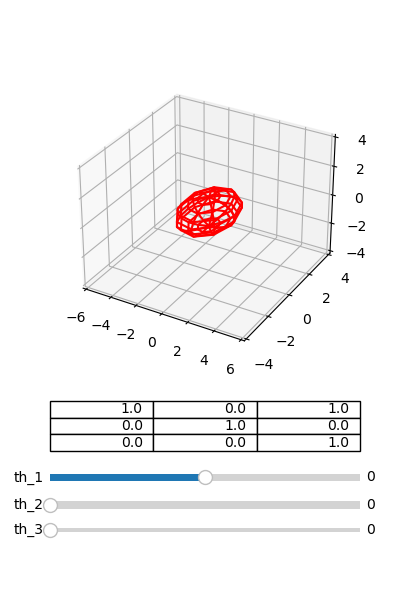

In [87]:
# this is the main code for the graphical gaussian
# based on examples from Matplotlib docs

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

import numpy as np
import matplotlib.pyplot as plt

ftop = 3
nslider = 3
frows = ftop+nslider
# fig = plt.figure()
fig, axtot  = plt.subplots(frows,1,figsize=(4,6), gridspec_kw={'height_ratios': [2, 0.2,0.3,.1,.1,.06]})
[axtot[i].axis('off') for i in range(frows)]
ax = fig.add_subplot(frows,1,1,projection='3d') # 3d plot
axt = fig.add_subplot(frows,1,2) # table
# plt.subplots_adjust(left=0.2, bottom=0.2, right=.8)

# table
plt.sca(axt)
plt.gca().axis('off')
data = [[1,0,1], [0,1,0],[0,0,1]] # data for table to display
n_rows = len(data)
cell_text = []
for row in data:
    cell_text.append([f'{x:1.1f}' for x in row])
the_table = axt.table(cellText=cell_text,
                      # rowLabels=rows,
                      # rowColours=colors,
                      # colLabels=columns,
                      loc='bottom')

# 3d plot
plt.sca(ax)

u = np.linspace(0, 2 * np.pi, 10)
v = np.linspace(0, np.pi, 10)
x = 2 * np.outer(np.cos(u), np.sin(v))
y = 2 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# x, y = np.mgrid[-3:3:30j, -3:3:30j]
# z = np.zeros(30*30).flatten().reshape(x.shape)
xyz = np.column_stack([x.flat, y.flat, z.flat])
r = R.from_euler('z', 0, degrees=True)
xyzr = (r.as_matrix() @ xyz.T).T
xr = xyzr[:,0].reshape(x.shape)
yr = xyzr[:,1].reshape(x.shape)
zr = xyzr[:,2].reshape(x.shape)
wf = ax.plot_wireframe(xr,yr,zr, color='r')
ax.margins(x=0)
ax.set_xlim(left=-6,right=6)
ax.set_ylim(bottom=-4,top=4)
ax.set_zlim(bottom=-4,top=4)

# sliders
axcolor = 'r'
axthetaz = fig.add_subplot(frows,1,ftop+1)
axthetaz.axis('off')
# axthetaz = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
sthetaz = Slider(axthetaz, 'th_1', -180, 180.0, valinit=0)
axthetax = fig.add_subplot(frows,1,ftop+2)
# axthetax = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
sthetax = Slider(axthetax, 'th_2', 0, 180.0, valinit=0)
axthetay = fig.add_subplot(frows,1,ftop+3)
# axthetay = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
sthetay = Slider(axthetay, 'th_3', 0, 180.0, valinit=0)



def update(val):
    global wf
    thetax = sthetax.val
    thetay = sthetay.val
    thetaz = sthetaz.val
    r = R.from_euler('xyz', [thetax,thetay,thetaz], degrees=True)
    xyzr = (r.as_matrix() @ xyz.T).T
    xr = xyzr[:,0].reshape(x.shape)
    yr = xyzr[:,1].reshape(x.shape)
    zr = xyzr[:,2].reshape(x.shape)
    wf.remove()
    wf = ax.plot_wireframe(xr,yr,zr, color='r')
    # fig.canvas.draw_idle()


sthetax.on_changed(update)
sthetay.on_changed(update)
sthetaz.on_changed(update)

# ax.set_xlim(0,10)
plt.show()

In [46]:
x.flatten

<function ndarray.flatten>

In [55]:
from scipy.spatial.transform import Rotation as R
r = R.from_euler('z', 90, degrees=True)
r.as_matrix()

array([[ 2.22044605e-16, -1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [56]:
x, y = np.mgrid[-3:3:30j, -3:3:30j]
z = np.zeros(30*30).flatten().reshape(x.shape)
xyz = np.column_stack([x.flat, y.flat, z.flat])


In [57]:
xyz


array([[-3.        , -3.        ,  0.        ],
       [-3.        , -2.79310345,  0.        ],
       [-3.        , -2.5862069 ,  0.        ],
       ...,
       [ 3.        ,  2.5862069 ,  0.        ],
       [ 3.        ,  2.79310345,  0.        ],
       [ 3.        ,  3.        ,  0.        ]])

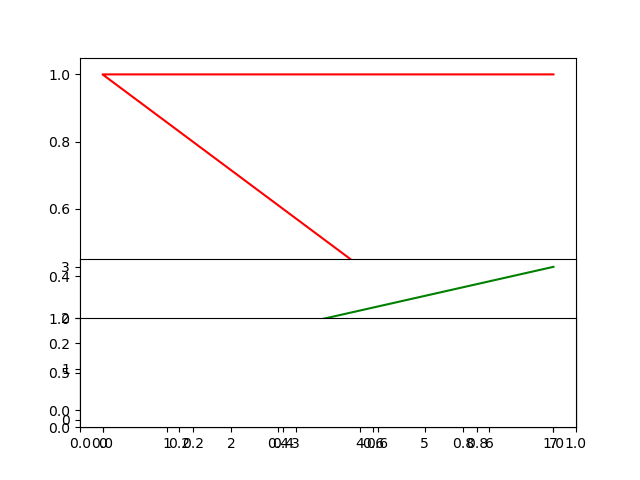

In [39]:

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

import numpy as np
import matplotlib.pyplot as plt

ax=[]
  
# fig, ax = plt.subplots(211)
fig = plt.figure()
ax.append(fig.add_subplot())
ax.append(fig.add_subplot(212))
ax.append(fig.add_subplot(313))
    
# fig, ax = plt.subplots(3,1)
# ax = fig.add_subplot(projection='3d') # 3d plot
# axt = fig.add_subplot() # table
# axs = fig.add_subplot() # sliders
# plt.subplots_adjust(left=0.2, bottom=0.2, right=.8)

ax[0].plot([1,0,1], [0,1,1],'r')
ax[1].plot([3,0,7], [0,1,3],'g')
# plt.sca(ax[1])
# # plt.gca().axis('off')
# plt.plot([0,4,4],[0,4,0])

plt.show()